# Experiments on Phylo HMMs

In [1]:
%matplotlib inline
import random
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np

from felsenstein import pruning
from viterbi_sumproduct import viterbi, sum_product
from model_evaluation import sub_tree, single_decoding_routine
from tree_serialisation import load_tree
from data_simulation import generate_case, rate_sub_HKY, scale_branches_length

## First example a toy gene finder

In [2]:
# SIMULATION PARAMETERS
tree_path = "tree.json"
alphabet = ['A', 'C', 'T', 'G']
alphabetSize = len(alphabet)

nbState = 4
# transition matrix of the toy gene finder
A = np.zeros((nbState, nbState))
A[0, 1] = 1
A[1, 2] = 1
A[2, 3] = 0.10
A[2, 0] = 1 - A[2, 3]
A[3, 3] = 0.8  # 0.9999  # unrealistic ...
A[3, 0] = 1 - A[3, 3]

# state initial probability
b = np.array([0.25, 0.25, 0.25, 0.25])

animalNames = ["dog", "cat", "pig", "cow", "rat", "mouse", "baboon", "human"]
n_species = len(animalNames)
"""[...], such as the higher average rate of substitution and the greater
transition/transversion ratio, in noncoding and third-codon-position sites
than in firstand second- codon-position sites[...]"""

pi_easy = np.load("pi_easy.npy")
pi_difficult = np.load("pi_difficult.npy")

# translation/transversion rate
kappa = np.array([2.3, 2.7, 4.3, 5.4])

# scaling factors for the different states
scaling_factors = np.load("scaling_factors.npy")

In [3]:
# MONTE-CARLO PARAMETERS
n_nucleotids = 1000
n_simulations = 200

In [4]:
np.seterr(all='warn')
precision_easy = np.zeros((n_simulations, n_species))
sensitivity_easy = np.zeros((n_simulations, n_species))
specificity_easy = np.zeros((n_simulations, n_species))
for n in range(n_simulations):
    for i,sub_indices in enumerate(
        [[5],[1,5],[1,4,5],[1,4,5,8],[1,2,4,5,8],[1,2,3,4,5,8],[1,2,3,4,5,7,8],range(1,9)]):
    
        precision_easy[n, i], sensitivity_easy[n, i], specificity_easy[n, i] = single_decoding_routine(tree_path, n_nucleotids, alphabet, A,
                            b, n_species, pi_easy, kappa, scaling_factors, alg='viterbi',
                            list_of_species=sub_indices)
        # Precision

    print("Simulation n°{:d}".format(n))

/home/zaccharie/workspace/PGM/Project/phylo-hmm/viterbi_sumproduct.py:49: RuntimeWarning: divide by zero encountered in log
  prob = np.log(A[:, s]) + alpha_log[:, t - 1]
/home/zaccharie/workspace/PGM/Project/phylo-hmm/viterbi_sumproduct.py:49: RuntimeWarning: divide by zero encountered in log
  prob = np.log(A[:, s]) + alpha_log[:, t - 1]


Simulation n°0
Simulation n°1
Simulation n°2
Simulation n°3
Simulation n°4
Simulation n°5
Simulation n°6
Simulation n°7
Simulation n°8
Simulation n°9
Simulation n°10
Simulation n°11
Simulation n°12
Simulation n°13
Simulation n°14
Simulation n°15
Simulation n°16
Simulation n°17
Simulation n°18
Simulation n°19
Simulation n°20
Simulation n°21
Simulation n°22
Simulation n°23
Simulation n°24
Simulation n°25
Simulation n°26
Simulation n°27
Simulation n°28
Simulation n°29
Simulation n°30
Simulation n°31
Simulation n°32
Simulation n°33
Simulation n°34
Simulation n°35
Simulation n°36
Simulation n°37
Simulation n°38
Simulation n°39
Simulation n°40
Simulation n°41
Simulation n°42
Simulation n°43
Simulation n°44
Simulation n°45
Simulation n°46
Simulation n°47
Simulation n°48
Simulation n°49
Simulation n°50
Simulation n°51
Simulation n°52
Simulation n°53
Simulation n°54
Simulation n°55
Simulation n°56
Simulation n°57
Simulation n°58
Simulation n°59
Simulation n°60
Simulation n°61
Simulation n°62
Si

/home/zaccharie/workspace/PGM/Project/phylo-hmm/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:504: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


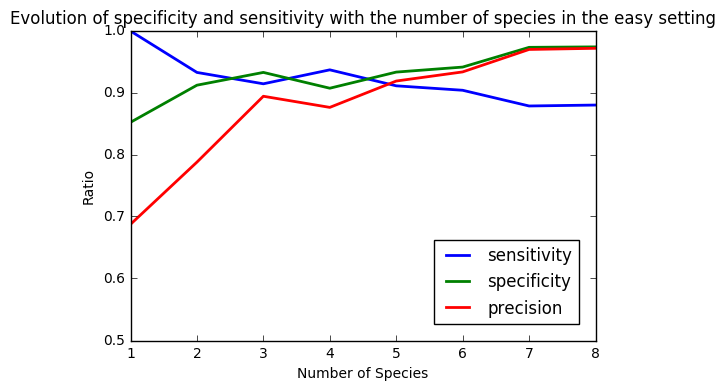

In [5]:
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.5, 1])
plt.ylabel('Ratio')
plt.xlabel('Number of Species')
handles= [
    #plt.plot(range(1, n_species+1), precision.mean(axis=0),
    #         linewidth=2),
    plt.plot(range(1, n_species+1), sensitivity_easy.mean(axis=0),
             linewidth=2),
    plt.plot(range(1, n_species+1), specificity_easy.mean(axis=0),
             linewidth=2),
    plt.plot(range(1, n_species+1), precision_easy.mean(axis=0),
             linewidth=2)
    ]
plt.legend(handles, labels=["sensitivity", "specificity", "precision"], #labels=["precision", "sensitivity", "specificity"],
           loc=4, borderaxespad=1)
plt.title("Evolution of specificity and sensitivity with the number of species in the easy setting")

In [ ]:
for i in range(n_species):
    plt.plot(np.cumsum(precision_easy[:, i])/ (np.arange(n_simulations)+1), label="{0} species".format(i+1))
plt.xlabel("Number of simulations")
plt.ylabel("Average precision")
plt.legend(loc=4)
    

In [ ]:
np.seterr(all='warn')
precision_difficult = np.zeros((n_simulations, n_species))
sensitivity_difficult = np.zeros((n_simulations, n_species))
specificity_difficult = np.zeros((n_simulations, n_species))
for n in range(n_simulations):
    for i,sub_indices in enumerate(
        [[5],[1,5],[1,4,5],[1,4,5,8],[1,2,4,5,8],[1,2,3,4,5,8],[1,2,3,4,5,7,8],range(1,9)]):
    
        precision_difficult[n, i], sensitivity_difficult[n, i], specificity_difficult[n, i] = single_decoding_routine(tree_path, n_nucleotids, alphabet, A,
                            b, n_species, pi_difficult, kappa, scaling_factors, alg='viterbi',
                            list_of_species=sub_indices)
        # Precision

    print("Simulation n°{:d}".format(n))

In [ ]:
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.3, 1])
plt.xlabel('Number of species')
plt.ylabel('Ratio')
handles= [
    #plt.plot(range(1, n_species+1), precision.mean(axis=0),
    #         linewidth=2),
    plt.plot(range(1, n_species+1), sensitivity_difficult.mean(axis=0),
             linewidth=2),
    plt.plot(range(1, n_species+1), specificity_difficult.mean(axis=0),
             linewidth=2),
    plt.plot(range(1, n_species+1), precision_difficult.mean(axis=0),
             linewidth=2)
    ]
plt.legend(handles, labels=["sensitivity", "specificity", "precision"],
           loc=4, borderaxespad=1.)
plt.title("Evolution of specificity and sensitivity with the number of species in the difficult setting")

In [ ]:
print(pi_easy)
print(pi_difficult)

In [ ]:
np.mean(precision_easy[:,7])